In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Load and Explore Data (EDA)

In [4]:
# Load the dataset
# Make sure the file path matches where Kaggle stores the input data
try:
    df = pd.read_csv('data/heart.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: heart.csv not found. Please ensure the dataset is added correctly.")
    exit(1)

print("\n--- First 10 Rows ---")
df.head(20)

Dataset loaded successfully.

--- First 10 Rows ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [5]:
# Display basic information
print("\n--- Dataset Info ---")
df.info()



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
print("\n--- Descriptive Statistics ---")
df.describe()


--- Descriptive Statistics ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
print("\n--- Check for Missing Values ---")
print(df.isnull().sum())


--- Check for Missing Values ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64



--- Target Variable Distribution ---
target
1    526
0    499
Name: count, dtype: int64


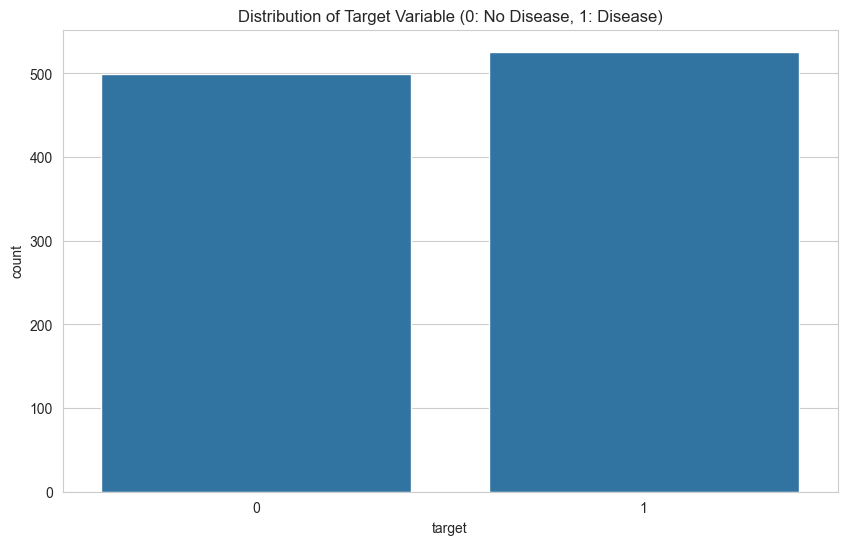

In [8]:
print("\n--- Target Variable Distribution ---")
target_counts = df['target'].value_counts()
print(target_counts)
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable (0: No Disease, 1: Disease)')
plt.show()

### EDA Visualizations


**Age Distribution:**

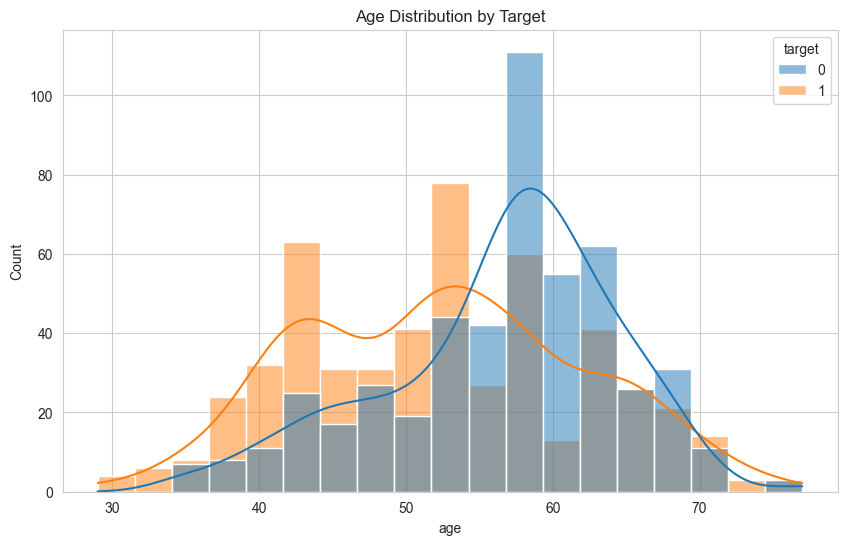

In [9]:
sns.histplot(data=df, x='age', hue='target', kde=True)
plt.title('Age Distribution by Target')
plt.show()

**Sex Distribution:** (0 = female, 1 = male)

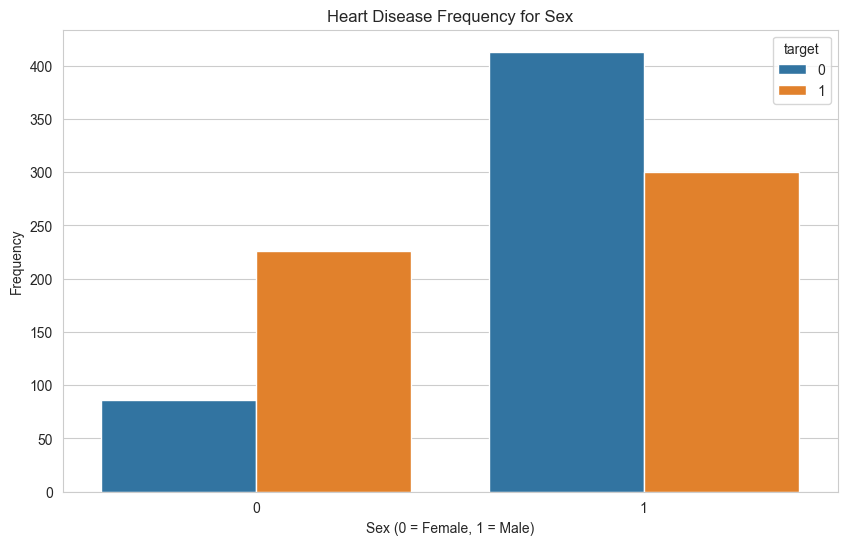

In [10]:
sns.countplot(data=df, x='sex', hue='target')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.show()

**Chest Pain Type (cp) Distribution:**
*   0: Typical angina
*   1: Atypical angina
*   2: Non-anginal pain
*   3: Asymptomatic

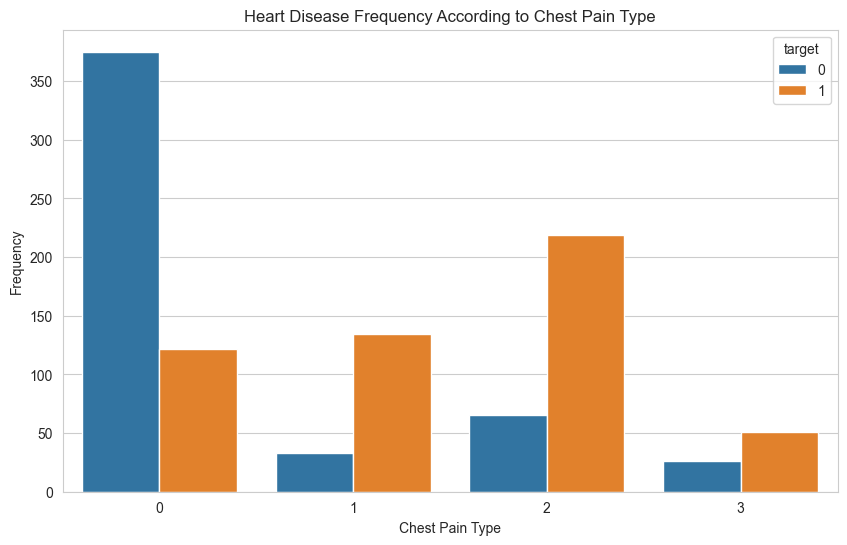

In [11]:
sns.countplot(data=df, x='cp', hue='target')
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.show()

**Correlation Heatmap:**

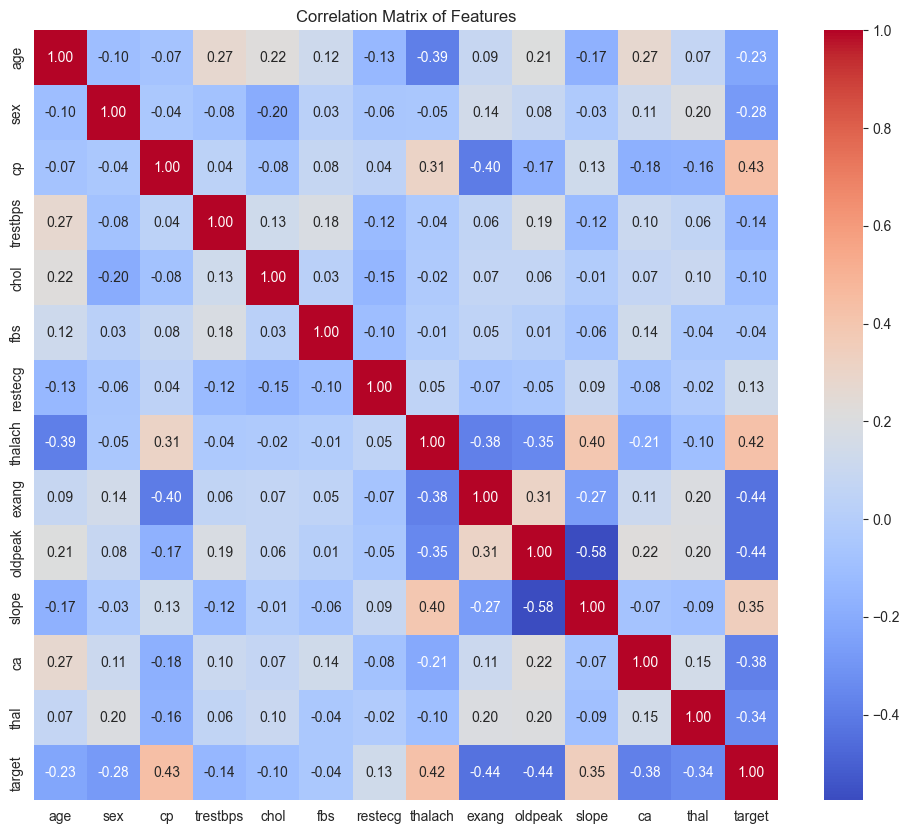

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

## 2. Data Preprocessing

We need to handle categorical features and scale numerical features.

*   **Categorical features:** `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`. Some are binary, others are nominal/ordinal. We'll use One-Hot Encoding for nominal features with more than 2 categories (`cp`, `restecg`, `slope`, `thal`, `ca`). Note: `sex`, `fbs`, `exang` are already 0/1.
*   **Numerical features:** `age`, `trestbps`, `chol`, `thalach`, `oldpeak`. We'll scale these using StandardScaler.

In [13]:
# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Identify feature types
categorical_features = ['cp', 'restecg', 'slope', 'ca', 'thal'] # Features to one-hot encode
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Binary features ('sex', 'fbs', 'exang') don't strictly need one-hot encoding or scaling if kept as 0/1

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (820, 13)
Test set shape: (205, 13)


In [14]:
# Create preprocessing pipelines for numerical and categorical features
# Numerical pipeline: Scale features
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Categorical pipeline: One-hot encode features
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # handle_unknown='ignore' is safer for unseen categories in test set
])

# Combine pipelines using ColumnTransformer
# Apply num_pipeline to numerical features
# Apply cat_pipeline to categorical features needing one-hot encoding
# Passthrough binary features ('sex', 'fbs', 'exang') or include them if preferred
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_features),
        ('cat', cat_pipeline, categorical_features),
        ('passthrough', 'passthrough', ['sex', 'fbs', 'exang']) # Keep binary features as they are
    ],
    remainder='drop' # Drop any columns not specified (shouldn't be any here)
)

# Apply the preprocessing pipeline to the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Apply the *fitted* preprocessing pipeline to the testing data
X_test_processed = preprocessor.transform(X_test)

# Get feature names after transformation (useful for some models like Tree-based ones)
feature_names_out = preprocessor.get_feature_names_out()
print(f"\nProcessed feature names ({X_train_processed.shape[1]} features):\n{feature_names_out}")


print(f"\nProcessed Training set shape: {X_train_processed.shape}")
print(f"Processed Test set shape: {X_test_processed.shape}")


Processed feature names (27 features):
['num__age' 'num__trestbps' 'num__chol' 'num__thalach' 'num__oldpeak'
 'cat__cp_0' 'cat__cp_1' 'cat__cp_2' 'cat__cp_3' 'cat__restecg_0'
 'cat__restecg_1' 'cat__restecg_2' 'cat__slope_0' 'cat__slope_1'
 'cat__slope_2' 'cat__ca_0' 'cat__ca_1' 'cat__ca_2' 'cat__ca_3'
 'cat__ca_4' 'cat__thal_0' 'cat__thal_1' 'cat__thal_2' 'cat__thal_3'
 'passthrough__sex' 'passthrough__fbs' 'passthrough__exang']

Processed Training set shape: (820, 27)
Processed Test set shape: (205, 27)


## 3. Train and Evaluate Machine Learning Models

We will train and evaluate the following models:
1.  Logistic Regression
2.  Random Forest Classifier
3.  Support Vector Machine (SVM)

--- Training Logistic Regression ---

--- Results for Logistic Regression ---
Training Accuracy: 0.8744
Test Accuracy: 0.8732
Logistic Regression CV ROC AUC: 0.9366 ± 0.0143
Test ROC AUC: 0.9435
Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.87       100
           1       0.86      0.90      0.88       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205

Test Confusion Matrix:
 [[84 16]
 [10 95]]


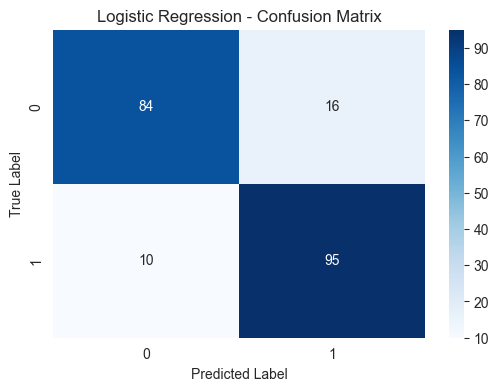

------------------------------
--- Training Support Vector Machine ---

--- Results for Support Vector Machine ---
Training Accuracy: 0.9512
Test Accuracy: 0.9463
Support Vector Machine CV ROC AUC: 0.9693 ± 0.0081
Test ROC AUC: 0.9753
Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       100
           1       0.94      0.96      0.95       105

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205

Test Confusion Matrix:
 [[ 93   7]
 [  4 101]]


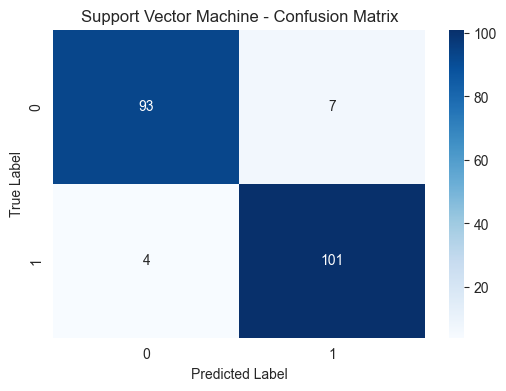

------------------------------
--- Training Gradient Boosting ---

--- Results for Gradient Boosting ---
Training Accuracy: 0.9939
Test Accuracy: 0.9902
Gradient Boosting CV ROC AUC: 0.9900 ± 0.0076
Test ROC AUC: 0.9931
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       100
           1       0.98      1.00      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Test Confusion Matrix:
 [[ 98   2]
 [  0 105]]


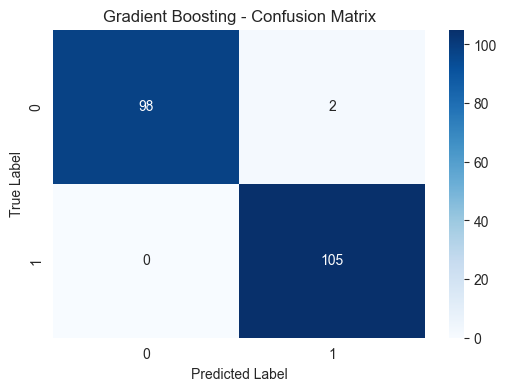

------------------------------


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Define models with expanded selection
models = {
    "Logistic Regression": LogisticRegression(max_iter=100, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"--- Training {name} ---")
    # Train the model
    model.fit(X_train_processed, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train_processed)
    y_pred_test = model.predict(X_test_processed)
    y_prob_test = model.predict_proba(X_test_processed)[:, 1] # Probabilities for ROC AUC

    # Evaluate the model
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    report_test = classification_report(y_test, y_pred_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    roc_auc = roc_auc_score(y_test, y_prob_test)
    cv_scores = cross_val_score(model, X_train_processed, y_train, cv=5, scoring='roc_auc')

    # Store results
    results[name] = {
        "model": model,
        "accuracy_train": accuracy_train,
        "accuracy_test": accuracy_test,
        "classification_report": report_test,
        "cv_scores": cv_scores,
        "roc_auc": roc_auc,
        "confusion_matrix": cm_test,
        "y_pred": y_pred_test,
        "y_prob": y_prob_test
    }

    # Print results
    print(f"\n--- Results for {name} ---")
    print(f"Training Accuracy: {accuracy_train:.4f}")
    print(f"Test Accuracy: {accuracy_test:.4f}")
    print(f"{name} CV ROC AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print(f"Test ROC AUC: {roc_auc:.4f}")
    print("Test Classification Report:\n", report_test)

    print("Test Confusion Matrix:\n", cm_test)
    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print("-" * 30)

## 4. Compare Models 

Let's compare the models based on Test Accuracy and ROC AUC Score.

In [16]:
# Display comparison summary
print("\n--- Model Comparison ---")
comparison_data = []
for name, result in results.items():
    comparison_data.append({
        "Model": name,
        "Test Accuracy": result['accuracy_test'],
        "Test ROC AUC": result['roc_auc']
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.sort_values(by='Test ROC AUC', ascending=False))




--- Model Comparison ---
                    Model  Test Accuracy  Test ROC AUC
2       Gradient Boosting       0.990244      0.993143
1  Support Vector Machine       0.946341      0.975333
0     Logistic Regression       0.873171      0.943524



--- Best Model Analysis ---

Overfitting Analysis:
Training Accuracy: 0.9939
Testing Accuracy: 0.9902
CV Accuracy: 0.9695 ± 0.0116
Train-Test Difference: 0.0037
Test-CV Difference: 0.0207

Model Status: 🔍 Possible data leakage or distribution issues
- Train and test accuracy are close
- But test accuracy differs from CV scores
- Check for data leakage or distribution problems in the split


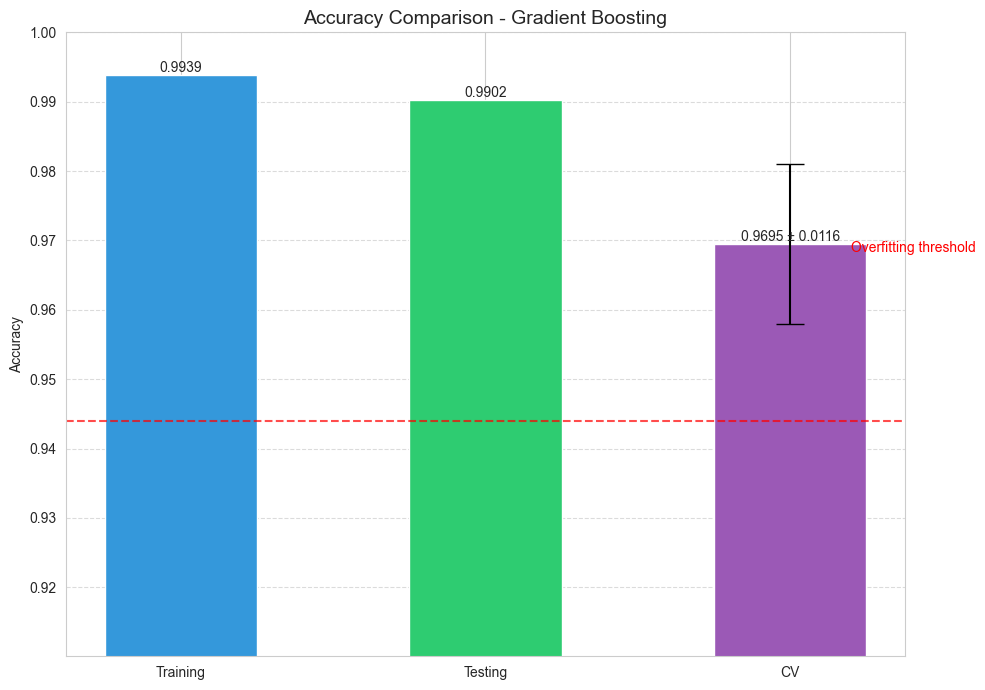

In [18]:
# Perform cross-validation for best model and get detailed metrics
from sklearn.model_selection import cross_val_score

print("\n--- Best Model Analysis ---")

# Define the best model based on the highest Test ROC AUC score
best_model_name = max(results, key=lambda name: results[name]['roc_auc'])
best_model = results[best_model_name]['model']

# Get the best model's test accuracy
best_accuracy = results[best_model_name]['accuracy_test']

# Perform cross-validation on training data to get cv_mean and cv_std
cv_scores = cross_val_score(best_model, X_train_processed, y_train, cv=5, scoring='accuracy')
best_cv_mean = cv_scores.mean()
best_cv_std = cv_scores.std()

# Calculate metrics for overfitting analysis
train_accuracy = results[best_model_name]['accuracy_train']
test_accuracy = best_accuracy
cv_accuracy = best_cv_mean
cv_std = best_cv_std

train_test_diff = train_accuracy - test_accuracy
overfitting_threshold = 0.05  
cv_test_diff = abs(test_accuracy - cv_accuracy)

print(f"\nOverfitting Analysis:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"CV Accuracy: {cv_accuracy:.4f} ± {cv_std:.4f}")
print(f"Train-Test Difference: {train_test_diff:.4f}")
print(f"Test-CV Difference: {cv_test_diff:.4f}")

if train_test_diff > overfitting_threshold:
    if cv_test_diff <= cv_std:
        print("\nModel Status: ⚠️ Moderate overfitting detected")
        print("- Train accuracy much higher than test accuracy")
        print("- Test accuracy is consistent with CV scores")
        print("- Consider adding regularization or simplifying the model")
    else:
        print("\nModel Status: ❌ Severe overfitting detected")
        print("- Train accuracy much higher than test accuracy")
        print("- Test accuracy inconsistent with CV scores")
        print("- Model needs significant simplification or more data")
elif cv_test_diff > cv_std:
    print("\nModel Status: 🔍 Possible data leakage or distribution issues")
    print("- Train and test accuracy are close")
    print("- But test accuracy differs from CV scores")
    print("- Check for data leakage or distribution problems in the split")
else:
    print("\nModel Status: ✅ Good generalization - No overfitting")
    print("- Train and test accuracy are reasonably close")
    print("- Test accuracy is consistent with CV results")

# Visualize training vs test accuracy with improved formatting
plt.figure(figsize=(10, 7))
bars = plt.bar(['Training', 'Testing', 'CV'], 
        [train_accuracy, test_accuracy, cv_accuracy], 
        color=['#3498db', '#2ecc71', '#9b59b6'], 
        width=0.5)

# Add error bar for CV
plt.errorbar('CV', cv_accuracy, yerr=cv_std, fmt='none', color='black', capsize=10)

# Customize the plot
plt.title(f'Accuracy Comparison - {best_model_name}', fontsize=14)
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set appropriate y-axis limits (dynamically)
min_val = min([train_accuracy, test_accuracy, cv_accuracy - cv_std]) * 0.95
max_val = min(1.0, max([train_accuracy, test_accuracy, cv_accuracy + cv_std]) * 1.05)
plt.ylim(min_val, max_val)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    if i == 2:  # CV bar
        label = f"{cv_accuracy:.4f} ± {cv_std:.4f}"
    else:
        label = f"{height:.4f}"
    plt.text(bar.get_x() + bar.get_width()/2, height,
             label, ha='center', va='bottom')

# Add a line for overfitting threshold
plt.axhline(y=train_accuracy - overfitting_threshold, color='red', linestyle='--', alpha=0.7)
plt.text(2.2, train_accuracy - overfitting_threshold/2, 'Overfitting threshold', 
         color='red', va='center')

plt.tight_layout()
plt.show()

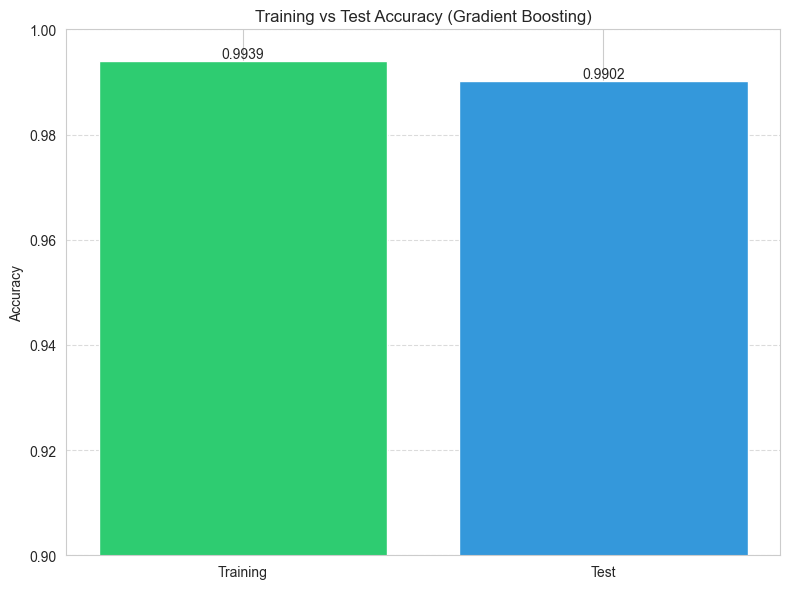

In [24]:

# Visualize training vs test accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Training', 'Test'], 
        [overfitting_analysis['Training Accuracy'], 
         overfitting_analysis['Test Accuracy']], 
        color=['#2ecc71', '#3498db'])
plt.title('Training vs Test Accuracy (Gradient Boosting)')
plt.ylabel('Accuracy')
plt.ylim(0.90, 1.0)  # Set y-axis limits for better visualization of small differences
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.text('Training', overfitting_analysis['Training Accuracy'], 
         f"{overfitting_analysis['Training Accuracy']:.4f}", 
         ha='center', va='bottom')
plt.text('Test', overfitting_analysis['Test Accuracy'], 
         f"{overfitting_analysis['Test Accuracy']:.4f}", 
         ha='center', va='bottom')
plt.tight_layout()
plt.show()


--- Feature Importance for Gradient Boosting ---
               Feature  Importance
5            cat__cp_0    0.261749
15           cat__ca_0    0.125835
22         cat__thal_2    0.124608
4         num__oldpeak    0.084451
0             num__age    0.072277
2            num__chol    0.062215
3         num__thalach    0.053514
1        num__trestbps    0.046598
23         cat__thal_3    0.030843
24    passthrough__sex    0.030313
26  passthrough__exang    0.029044
7            cat__cp_2    0.018041
13        cat__slope_1    0.013503
10      cat__restecg_1    0.012430
14        cat__slope_2    0.008844
8            cat__cp_3    0.008696
6            cat__cp_1    0.006064
19           cat__ca_4    0.002697
18           cat__ca_3    0.002558
17           cat__ca_2    0.001960
21         cat__thal_1    0.001935
25    passthrough__fbs    0.000880
16           cat__ca_1    0.000539
9       cat__restecg_0    0.000406
11      cat__restecg_2    0.000000
12        cat__slope_0    0.000000
20   

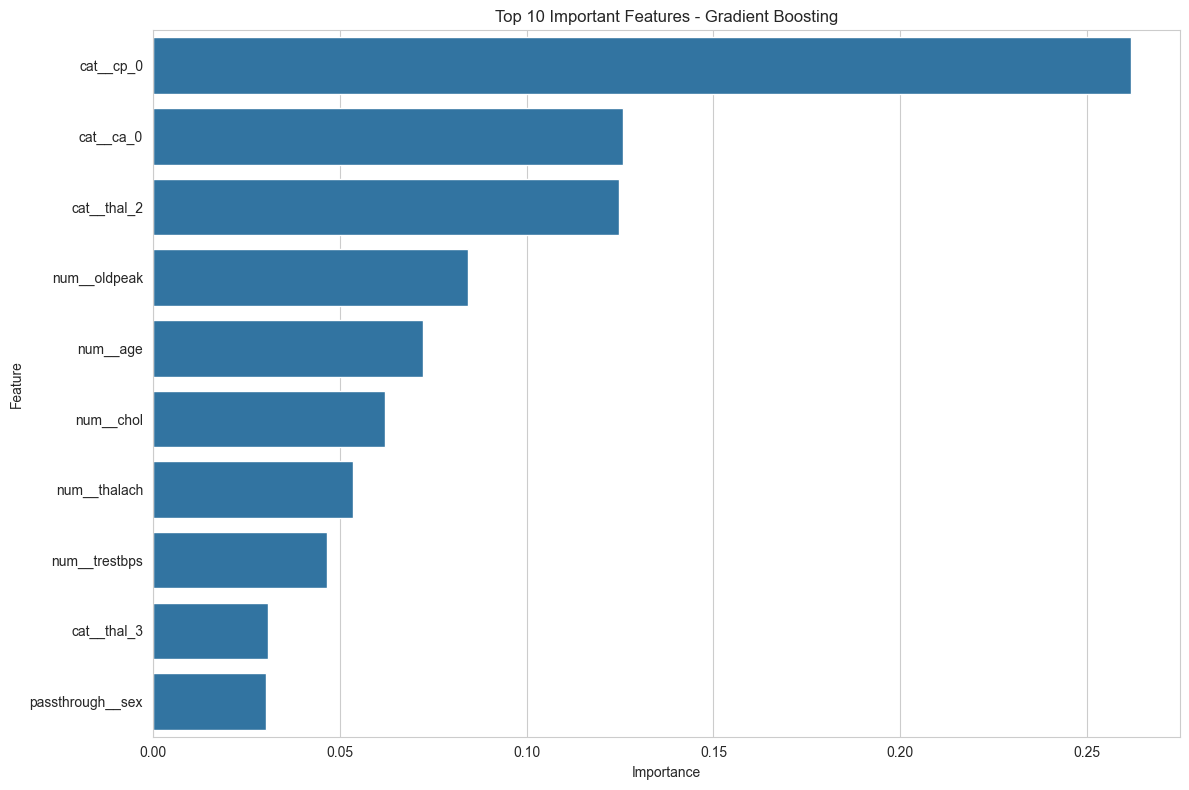

In [20]:
# Check if the best model supports feature importance
if hasattr(best_model, 'feature_importances_'):
    # Get feature importances
    importances = best_model.feature_importances_
    
    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names_out,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print(f"\n--- Feature Importance for {best_model_name} ---")
    print(feature_importance_df)
    
    # Plot the top 10 most important features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
    plt.title(f'Top 10 Important Features - {best_model_name}')
    plt.tight_layout()
    plt.show()
else:
    print(f"\n{best_model_name} doesn't provide direct feature importance.")
    
    # For Logistic Regression and SVM, we can look at coefficients
    if hasattr(best_model, 'coef_'):
        # Get coefficients (absolute values for importance)
        if len(best_model.coef_.shape) > 1:
            coefficients = np.abs(best_model.coef_[0])
        else:
            coefficients = np.abs(best_model.coef_)
        
        # Create a DataFrame
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names_out,
            'Coefficient (abs)': coefficients
        }).sort_values('Coefficient (abs)', ascending=False)
        
        print(f"\n--- Feature Coefficients for {best_model_name} ---")
        print(feature_importance_df)
        
        # Plot the top 10 features
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Coefficient (abs)', y='Feature', data=feature_importance_df.head(10))
        plt.title(f'Top 10 Features by Coefficient Magnitude - {best_model_name}')
        plt.tight_layout()
        plt.show()


--- Learning Curve Analysis for Gradient Boosting ---


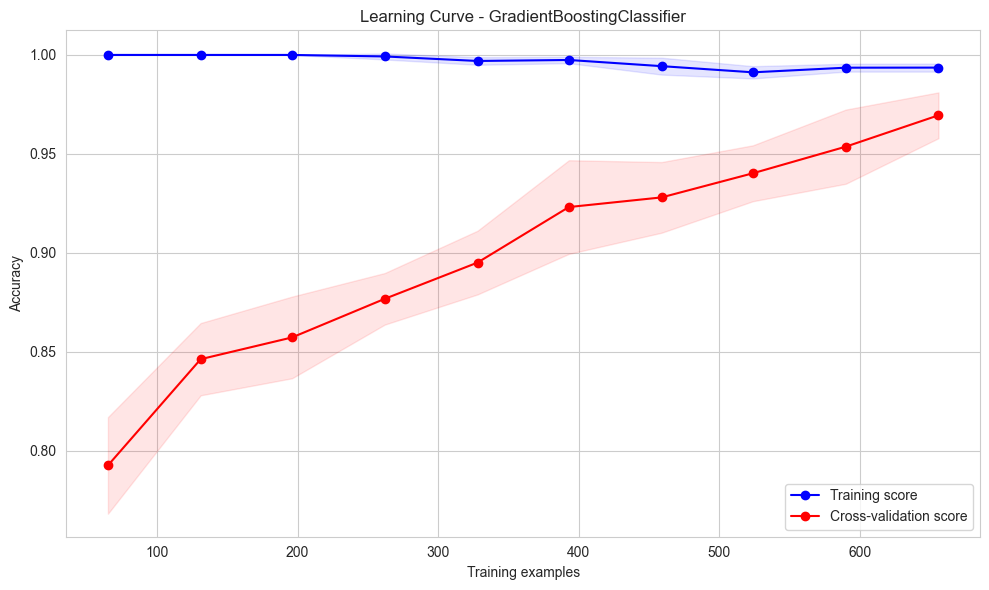

In [21]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy', n_jobs=-1
    )
    
    # Calculate mean and standard deviation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    validation_mean = np.mean(validation_scores, axis=1)
    validation_std = np.std(validation_scores, axis=1)
    
    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                     alpha=0.1, color="blue")
    plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, 
                     alpha=0.1, color="red")
    
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
    plt.plot(train_sizes, validation_mean, 'o-', color="red", label="Cross-validation score")
    
    plt.title(f"Learning Curve - {model.__class__.__name__}")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

# Generate learning curve for the best model
print(f"\n--- Learning Curve Analysis for {best_model_name} ---")
plot_learning_curve(best_model, X_train_processed, y_train)

## Save Model

In [22]:
import joblib

model_filename = 'Trainied Model/heart_disease_model.pkl'
preprocessor_filename = 'Trainied Model/heart_disease_preprocessor.pkl'

joblib.dump(best_model, model_filename)
joblib.dump(preprocessor, preprocessor_filename)

print(f"\nBest model saved as: {model_filename}")
print(f"Preprocessor saved as: {preprocessor_filename}")


Best model saved as: Trainied Model/heart_disease_model.pkl
Preprocessor saved as: Trainied Model/heart_disease_preprocessor.pkl


## Test Model Manaully

Model and preprocessor loaded successfully.

----- Heart Disease Detection Test Results -----

Case: Low Risk Patient
Heart Disease Detection: POSITIVE
--------------------------------------------------
Case: High Risk Patient
Heart Disease Detection: NEGATIVE
--------------------------------------------------
Case: Medium Risk Patient
Heart Disease Detection: NEGATIVE
--------------------------------------------------


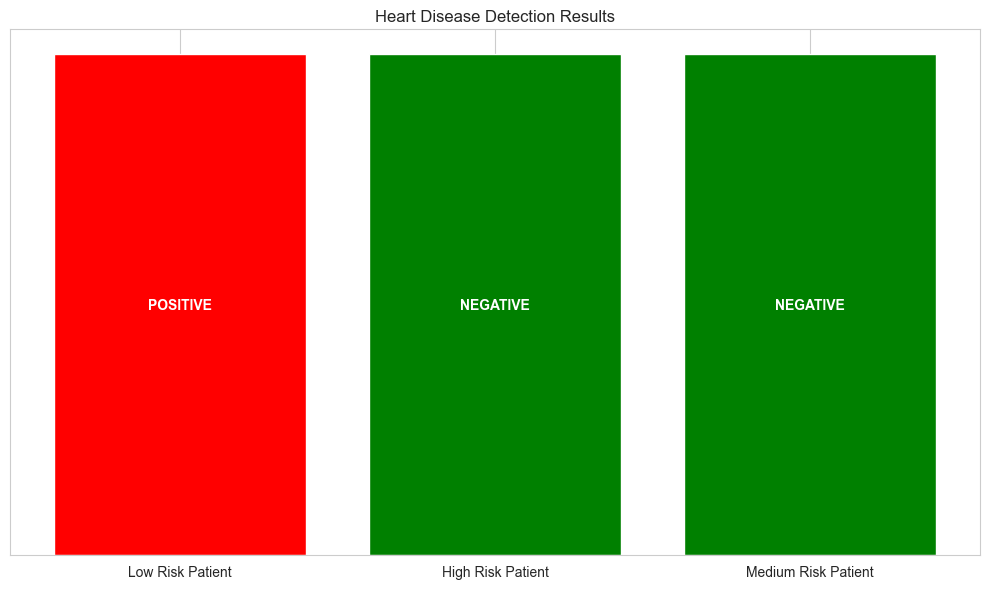

In [23]:
# Code to test the heart disease model with manual test cases - Focused on detection results
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model and preprocessor
try:
    model = joblib.load('Trainied Model/heart_disease_model.pkl')
    preprocessor = joblib.load('Trainied Model/heart_disease_preprocessor.pkl')
    print("Model and preprocessor loaded successfully.")
except FileNotFoundError:
    print("Error: Model or preprocessor files not found. Please ensure they exist in the 'Trainied Model' directory.")

# Function to make predictions on new data
def predict_heart_disease(patient_data):
    """
    Predict heart disease based on patient data.
    
    Parameters:
    patient_data (dict): Dictionary containing patient features
    
    Returns:
    str: "POSITIVE" or "NEGATIVE" for heart disease
    """
    # Convert dictionary to DataFrame
    df = pd.DataFrame([patient_data])
    
    # Apply the same preprocessing as during training
    processed_data = preprocessor.transform(df)
    
    # Make prediction
    prediction = model.predict(processed_data)[0]
    
    # Return simple positive/negative result
    return "POSITIVE" if prediction == 1 else "NEGATIVE"

# Define test cases
test_cases = [
    {
        "case_name": "Low Risk Patient",
        "data": {
            "age": 45,
            "sex": 0,  # Female
            "cp": 0,    # Typical angina
            "trestbps": 120,  # Normal resting blood pressure
            "chol": 180,  # Normal cholesterol
            "fbs": 0,  # Fasting blood sugar < 120 mg/dl
            "restecg": 0,  # Normal resting ECG
            "thalach": 180,  # Maximum heart rate achieved
            "exang": 0,  # No exercise-induced angina
            "oldpeak": 0.0,  # No ST depression induced by exercise
            "slope": 1,  # Flat ST slope
            "ca": 0,  # No major vessels colored by fluoroscopy
            "thal": 2   # Normal blood flow
        }
    },
    {
        "case_name": "High Risk Patient",
        "data": {
            "age": 65,
            "sex": 1,  # Male
            "cp": 3,    # Asymptomatic chest pain
            "trestbps": 160,  # High resting blood pressure
            "chol": 280,  # High cholesterol
            "fbs": 1,  # Fasting blood sugar > 120 mg/dl
            "restecg": 2,  # Left ventricular hypertrophy
            "thalach": 120,  # Low maximum heart rate
            "exang": 1,  # Exercise-induced angina
            "oldpeak": 3.0,  # Significant ST depression
            "slope": 0,  # Upsloping ST segment
            "ca": 3,  # Multiple major vessels colored
            "thal": 1   # Fixed defect
        }
    },
    {
        "case_name": "Medium Risk Patient",
        "data": {
            "age": 55,
            "sex": 1,  # Male
            "cp": 1,    # Atypical angina
            "trestbps": 140,  # Borderline high blood pressure
            "chol": 240,  # Borderline high cholesterol
            "fbs": 0,  # Normal fasting blood sugar
            "restecg": 1,  # ST-T wave abnormality
            "thalach": 150,  # Average maximum heart rate
            "exang": 0,  # No exercise-induced angina
            "oldpeak": 1.5,  # Moderate ST depression
            "slope": 1,  # Flat slope
            "ca": 1,  # One major vessel colored
            "thal": 2   # Normal blood flow
        }
    }
]

# Function to display results with visualization that includes positive/negative detection only
def test_model_with_cases(test_cases):
    results = []
    
    print("\n----- Heart Disease Detection Test Results -----\n")
    
    for case in test_cases:
        detection_result = predict_heart_disease(case["data"])
        
        result = {
            "Case": case["case_name"],
            "Detection Result": detection_result
        }
        results.append(result)
        
        print(f"Case: {case['case_name']}")
        print(f"Heart Disease Detection: {detection_result}")
        print("-" * 50)
    
    # Create a DataFrame for better visualization
    results_df = pd.DataFrame(results)
    
    # Create a simple bar chart visualization for positive/negative results
    plt.figure(figsize=(10, 6))
    colors = ['green' if result == 'NEGATIVE' else 'red' for result in results_df['Detection Result']]
    
    plt.bar(results_df['Case'], [1] * len(results_df), color=colors)
    plt.yticks([])  # Hide y-axis ticks as they're not meaningful here
    plt.title('Heart Disease Detection Results')
    
    # Add labels on top of bars
    for i, result in enumerate(results_df['Detection Result']):
        plt.text(i, 0.5, result, ha='center', va='center', fontweight='bold', color='white')
    
    plt.tight_layout()
    plt.show()
    
    return results_df

# Run the test
results_df = test_model_with_cases(test_cases)